In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive.zip'

extract_path = '/content/dataset'

print("Dosyalar çıkartılıyor... (Bu işlem 1-2 dk sürebilir)")

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Başarılı! Dosyalar çıkartıldı.")
else:
    print("❌ HATA: Zip dosyası bulunamadı! Lütfen dosya adının 'archive.zip' olduğundan emin ol.")

Dosyalar çıkartılıyor... (Bu işlem 1-2 dk sürebilir)
✅ Başarılı! Dosyalar çıkartıldı.


In [ ]:
########################################
# Hilal Esra Akça
# Base Model=Custom CNN
# Advanced Model=VİT

import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.models import vit_b_16, ViT_B_16_Weights
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import os

# ------------ CİHAZ SEÇİMİ ------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Kullanılan cihaz:", device)

# ------------ DATA PATH  ------------
train_dir = "/content/dataset/alziemer_dataset/train"
val_dir   = "/content/dataset/alziemer_dataset/val"
test_dir  = "/content/dataset/alziemer_dataset/test"


# ------------ TRANSFORM ------------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

# ------------ BOZUK GÖRSELLERİ ATLAMA ------------
def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.verify()
        return True
    except Exception:
        print("⚠️ Bozuk/okunamayan görsel atlandı:", path)
        return False

# ------------ DATASET & DATALOADER ------------
train_dataset = datasets.ImageFolder(train_dir, transform=transform, is_valid_file=is_valid_image)
val_dataset   = datasets.ImageFolder(val_dir,   transform=transform, is_valid_file=is_valid_image)
test_dataset  = datasets.ImageFolder(test_dir,  transform=transform, is_valid_file=is_valid_image)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True,  num_workers=0)
val_loader   = DataLoader(val_dataset,   batch_size=16, shuffle=False, num_workers=0)
test_loader  = DataLoader(test_dataset,  batch_size=16, shuffle=False, num_workers=0)

print("Train görüntü sayısı:", len(train_dataset))
print("Val   görüntü sayısı:", len(val_dataset))
print("Test  görüntü sayısı:", len(test_dataset))
print("Sınıflar:", train_dataset.classes)

num_classes = len(train_dataset.classes)



Kullanılan cihaz: cuda
⚠️ Bozuk/okunamayan görsel atlandı: /content/dataset/alziemer_dataset/train/Moderate Dementia/Moderate Dementia_original_64.jpg
Train görüntü sayısı: 11199
Val   görüntü sayısı: 2400
Test  görüntü sayısı: 2400
Sınıflar: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


Kullanılan Cihaz: cuda

[1/3] Custom CNN (Base) Modeli Hazırlanıyor...

>>> BAŞLATILIYOR: Custom_CNN_Base (Epochs: 15)
----------------------------------------
Epoch 1/15
  TRAIN Loss: 0.3808 Acc: 0.8564
  VAL Loss: 0.0276 Acc: 0.9917
Epoch 2/15
  TRAIN Loss: 0.0579 Acc: 0.9804
  VAL Loss: 0.0164 Acc: 0.9967
Epoch 3/15
  TRAIN Loss: 0.0376 Acc: 0.9876
  VAL Loss: 0.0269 Acc: 0.9929
Epoch 4/15
  TRAIN Loss: 0.0227 Acc: 0.9922
  VAL Loss: 0.0220 Acc: 0.9967
Epoch 5/15
  TRAIN Loss: 0.0154 Acc: 0.9954
  VAL Loss: 0.0189 Acc: 0.9933
Epoch 6/15
  TRAIN Loss: 0.0296 Acc: 0.9915
  VAL Loss: 0.0226 Acc: 0.9967
Epoch 7/15
  TRAIN Loss: 0.0140 Acc: 0.9954
  VAL Loss: 0.0160 Acc: 0.9979
Epoch 8/15
  TRAIN Loss: 0.0148 Acc: 0.9963
  VAL Loss: 0.0062 Acc: 0.9988
Epoch 9/15
  TRAIN Loss: 0.0154 Acc: 0.9949
  VAL Loss: 0.0139 Acc: 0.9983
Epoch 10/15
  TRAIN Loss: 0.0277 Acc: 0.9928
  VAL Loss: 0.0132 Acc: 0.9971
Epoch 11/15
  TRAIN Loss: 0.0060 Acc: 0.9980
  VAL Loss: 0.0084 Acc: 0.9992
Epoch 12/15
 

100%|██████████| 330M/330M [00:01<00:00, 196MB/s]



>>> BAŞLATILIYOR: ViT_B16_Advanced (Epochs: 10)
----------------------------------------
Epoch 1/10
  TRAIN Loss: 0.1656 Acc: 0.9365
  VAL Loss: 0.0422 Acc: 0.9854
Epoch 2/10
  TRAIN Loss: 0.0217 Acc: 0.9942
  VAL Loss: 0.0030 Acc: 1.0000
Epoch 3/10
  TRAIN Loss: 0.0226 Acc: 0.9917
  VAL Loss: 0.0060 Acc: 0.9983
Epoch 4/10
  TRAIN Loss: 0.0013 Acc: 0.9999
  VAL Loss: 0.0012 Acc: 1.0000
Epoch 5/10
  TRAIN Loss: 0.0005 Acc: 1.0000
  VAL Loss: 0.0009 Acc: 1.0000
Epoch 6/10
  TRAIN Loss: 0.0004 Acc: 1.0000
  VAL Loss: 0.0007 Acc: 1.0000
Epoch 7/10
  TRAIN Loss: 0.0003 Acc: 1.0000
  VAL Loss: 0.0006 Acc: 1.0000
Epoch 8/10
  TRAIN Loss: 0.0003 Acc: 1.0000
  VAL Loss: 0.0006 Acc: 1.0000
Epoch 9/10
  TRAIN Loss: 0.0003 Acc: 1.0000
  VAL Loss: 0.0006 Acc: 1.0000
Epoch 10/10
  TRAIN Loss: 0.0003 Acc: 1.0000
  VAL Loss: 0.0006 Acc: 1.0000

ViT_B16_Advanced tamamlandı: 71m 17s
Best Val Acc: 1.0000

[3/3] Grafikler Çiziliyor...


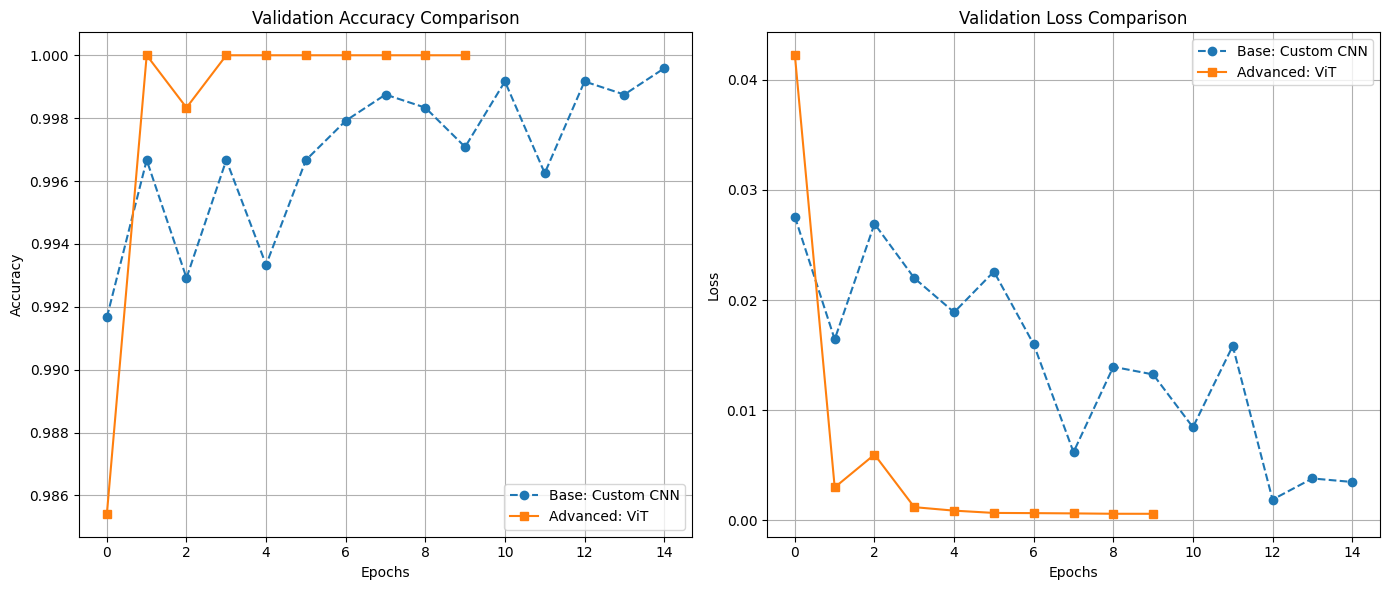

In [ ]:
import time
import copy
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import vit_b_16, ViT_B_16_Weights

# 1. CİHAZ AYARI
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Kullanılan Cihaz: {device}")

# ==========================================
# 2. CUSTOM CNN MODELİ
# ==========================================
class CustomCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(CustomCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

# ==========================================
# 3. GELİŞMİŞ EĞİTİM FONKSİYONU
# ==========================================
history_dict = {}

def train_model_full(model, model_name, criterion, optimizer, scheduler=None, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_loss_history, val_loss_history = [], []
    train_acc_history, val_acc_history = [], []

    print(f"\n>>> BAŞLATILIYOR: {model_name} (Epochs: {num_epochs})")
    print("-" * 40)

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train' and scheduler:
                scheduler.step()

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'  {phase.upper()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc.item())
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc.item())

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), f"{model_name}_final_best.pth")

    time_elapsed = time.time() - since
    print(f'\n{model_name} tamamlandı: {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best Val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    history_dict[model_name] = {
        'train_loss': train_loss_history, 'val_loss': val_loss_history,
        'train_acc': train_acc_history, 'val_acc': val_acc_history
    }
    return model

# Ortak Loss Fonksiyonu
criterion = nn.CrossEntropyLoss()

# ==========================================
# 4. MODELLERİN EĞİTİMİ
# ==========================================

# --- A) Base Model (Custom CNN) ---
print("\n[1/3] Custom CNN (Base) Modeli Hazırlanıyor...")
base_model = CustomCNN(num_classes=4).to(device)
optimizer_base = torch.optim.Adam(base_model.parameters(), lr=0.001)

base_model = train_model_full(
    base_model, "Custom_CNN_Base", criterion, optimizer_base, num_epochs=15
)

# --- B) Advanced Model (ViT) ---
print("\n[2/3] Vision Transformer (Advanced) Modeli Hazırlanıyor...")
weights = ViT_B_16_Weights.IMAGENET1K_V1
advanced_model = vit_b_16(weights=weights)
advanced_model.heads.head = nn.Linear(768, 4)
advanced_model = advanced_model.to(device)

optimizer_adv = torch.optim.Adam(advanced_model.parameters(), lr=3e-5)
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_adv, step_size=3, gamma=0.1)

advanced_model = train_model_full(
    advanced_model, "ViT_B16_Advanced", criterion, optimizer_adv,
    scheduler=exp_lr_scheduler, num_epochs=10
)

# ==========================================
# 5. GRAFİKLER
# ==========================================
print("\n[3/3] Grafikler Çiziliyor...")
plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dict['Custom_CNN_Base']['val_acc'], label='Base: Custom CNN', marker='o', linestyle='--')
plt.plot(history_dict['ViT_B16_Advanced']['val_acc'], label='Advanced: ViT', marker='s')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['Custom_CNN_Base']['val_loss'], label='Base: Custom CNN', marker='o', linestyle='--')
plt.plot(history_dict['ViT_B16_Advanced']['val_loss'], label='Advanced: ViT', marker='s')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)

plt.tight_layout()
plt.savefig("Member1_Comparison_Result.png")
plt.show()